In [1]:
import pandas as pd
import numpy as np

from scipy.spatial.distance import cdist
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import os

In [2]:
def compute_dcr(synthetic_data, original_data):
    """
    Compute the Distance to Closest Record (DCR) for each synthetic sample.
    
    Parameters:
    - synthetic_data: array-like, shape (n_samples, n_features), synthetic samples
    - original_data: array-like, shape (m_samples, n_features), original samples
    
    Returns:
    - dcr_scores: array of minimum distances for each synthetic sample
    """
    # Compute L1 distance between each synthetic record and all original records
    distances = cdist(synthetic_data, original_data, metric='cityblock')
    
    # Get the minimum distance to closest original record for each synthetic record
    dcr_scores = distances.min(axis=1)
    
    return dcr_scores

In [3]:
file_name = "adult_original_train.csv"
org_train_df = pd.read_csv(f"../data_split/original_train_dataset/{file_name}")

org_train_df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,Others,51362,13,Single,White Collar,White,Female,0,0,16,United-States,<=50K
1,41,Others,203217,4,Single,Blue Collar,White,Male,0,0,40,Mexico,<=50K
2,25,Others,51498,8,Single,Others,White,Male,0,0,40,United-States,<=50K
3,28,Others,179512,9,Single,White Collar,White,Female,0,0,50,United-States,<=50K
4,42,Others,177989,9,Married,Blue Collar,White,Male,0,0,40,United-States,<=50K


In [4]:
len(org_train_df)

30260

In [5]:
file_name = "adult_original_test.csv"
org_test_df = pd.read_csv(f"../data_split/original_test_dataset/{file_name}")

org_test_df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,32,Others,33117,11,Married,Others,White,Male,0,0,40,United-States,<=50K
1,51,Others,233149,12,Married,White Collar,White,Male,0,0,45,United-States,>50K
2,84,Others,188328,9,Single,White Collar,White,Female,0,0,16,United-States,<=50K
3,45,Others,158685,9,Single,White Collar,White,Female,0,0,40,United-States,<=50K
4,44,Others,112847,4,Married,Blue Collar,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K


In [6]:
dataset_folder = "adult"

In [7]:
synth_data = "../generated_datasets/adult/great_gpt2_6_layer_adult/samples/test/sample1.csv"
synth_data = pd.read_csv(synth_data)
synth_data = synth_data.drop('Unnamed: 0', axis=1) 
synth_data.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,21.0,Others,228696.0,9.0,Single,Blue Collar,White,Male,0.0,0.0,30.0,United-States,<=50K
1,19.0,Others,171416.0,9.0,Single,Others,White,Female,0.0,0.0,35.0,United-States,<=50K
2,35.0,Others,208946.0,13.0,Single,Blue Collar,White,Male,0.0,0.0,40.0,Mexico,<=50K
3,35.0,Others,160968.0,9.0,Married,Blue Collar,White,Male,0.0,0.0,40.0,United-States,<=50K
4,45.0,Others,163003.0,13.0,Married,White Collar,White,Male,15024.0,0.0,70.0,United-States,>50K


In [8]:
len(synth_data)

14910

In [9]:
le_workclass = LabelEncoder()
le_marital_status = LabelEncoder()
le_occupation = LabelEncoder()
le_race = LabelEncoder()
le_gender = LabelEncoder()
le_native_country = LabelEncoder()
le_income = LabelEncoder()

column_name = "workclass"
org_train_df[column_name] = le_workclass.fit_transform(org_train_df[column_name])
synth_data[column_name] = le_workclass.transform(synth_data[column_name])

column_name = "marital-status"
org_train_df[column_name] = le_marital_status.fit_transform(org_train_df[column_name])
synth_data[column_name] = le_marital_status.transform(synth_data[column_name])

column_name = "occupation"
org_train_df[column_name] = le_occupation.fit_transform(org_train_df[column_name])
synth_data[column_name] = le_occupation.transform(synth_data[column_name])

column_name = "race"
org_train_df[column_name] = le_race.fit_transform(org_train_df[column_name])
synth_data[column_name] = le_race.transform(synth_data[column_name])

column_name = "gender"
org_train_df[column_name] = le_gender.fit_transform(org_train_df[column_name])
synth_data[column_name] = le_gender.transform(synth_data[column_name])

column_name = "native-country"
org_train_df[column_name] = le_native_country.fit_transform(org_train_df[column_name])
synth_data[column_name] = le_native_country.transform(synth_data[column_name])

column_name = "income"
org_train_df[column_name] = le_income.fit_transform(org_train_df[column_name])
synth_data[column_name] = le_income.transform(synth_data[column_name])



In [10]:
temp = compute_dcr(synth_data, org_train_df)

In [11]:
len(temp)

14910

In [12]:
pd.DataFrame(temp).describe().round()


,0
count,14910.0
mean,108.0
std,7675.0
min,0.0
25%,12.0
50%,19.0
75%,28.0
max,936145.0


In [13]:
np.quantile(temp, [0.25, 0.5, 0.97])

array([12., 19., 96.])

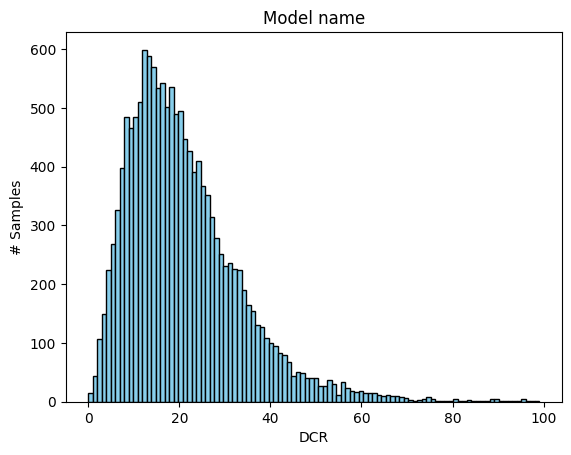

In [14]:
os.makedirs("../final_results/adult_dcr_hist", exist_ok=True)

filtered_scores = temp[temp < 100]  # Adjust threshold as needed
plt.hist(filtered_scores, bins=100, color='skyblue', edgecolor='black')
plt.xlabel('DCR')
plt.ylabel('# Samples')
plt.title('Model name')
plt.savefig("../final_results/adult_dcr_hist/comparison_plot.png")
plt.show()

## Using dcr plot using function

In [15]:
import pandas as pd
import numpy as np

from scipy.spatial.distance import cdist
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import os
from general_dcr import dcr_adult

In [16]:
file_name = "adult_original_train.csv"
org_train_df = pd.read_csv(f"../data_split/original_train_dataset/{file_name}")

file_name = "adult_original_test.csv"
org_test_df = pd.read_csv(f"../data_split/original_test_dataset/{file_name}")


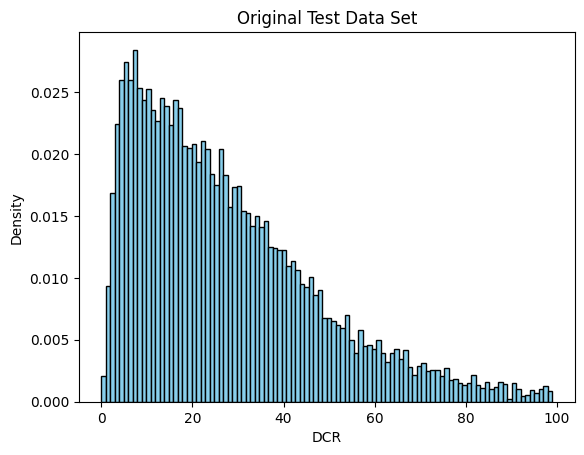

great_gpt2_12_layer_adult


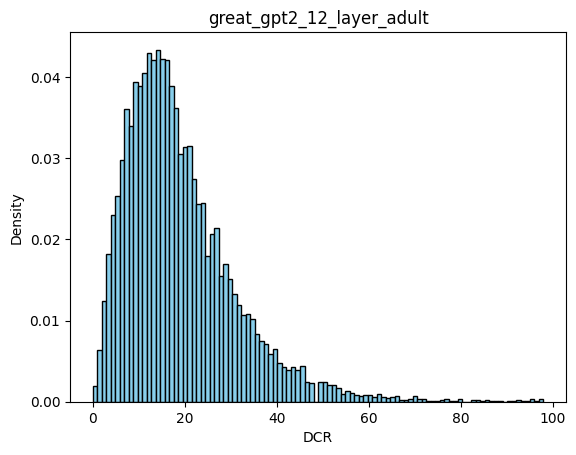

great_gpt2_6_layer_adult


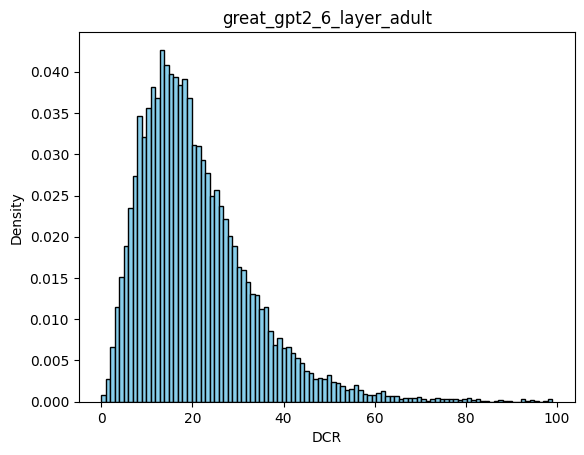

realtab_gpt2_12_layer_adult


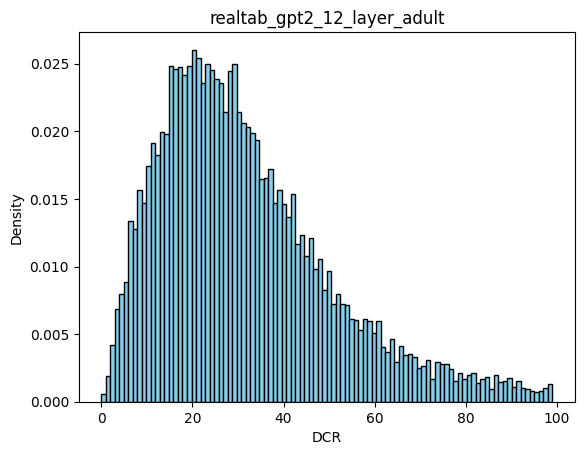

realtab_gpt2_6_layer_adult


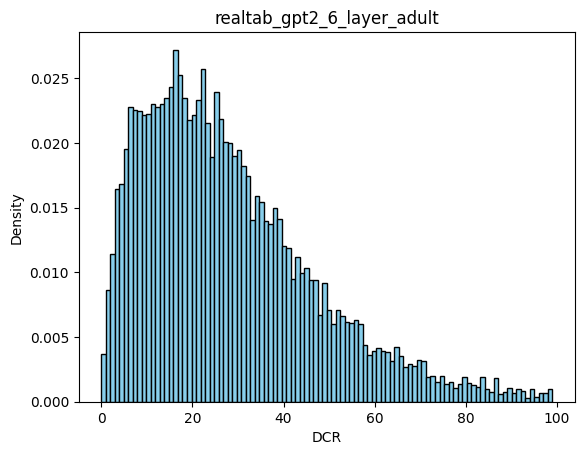

realtab_gpt_bigcode_12_layer_adult


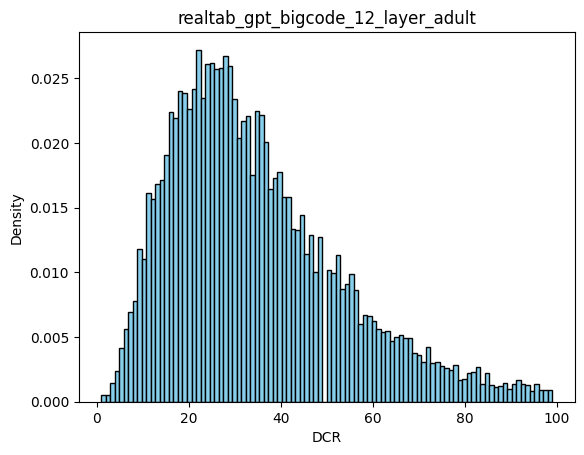

realtab_gpt_bigcode_6_layer_adult


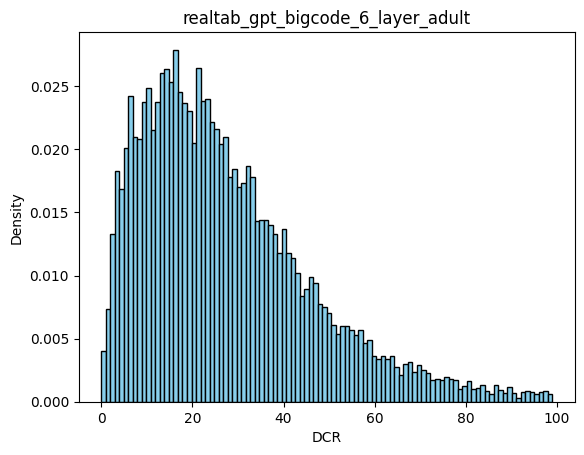

realtab_gpt_neo_2_layer_adult


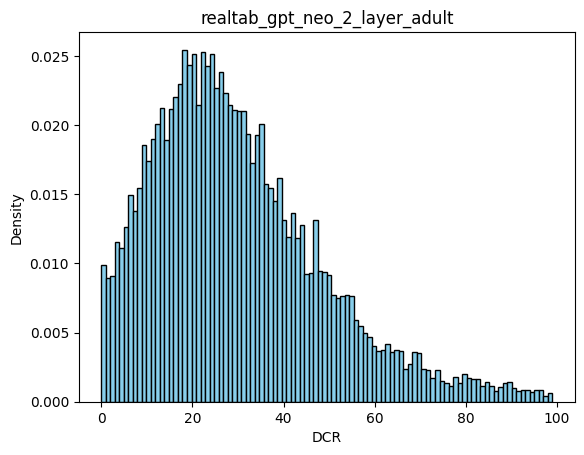

realtab_gpt_neo_4_layer_adult


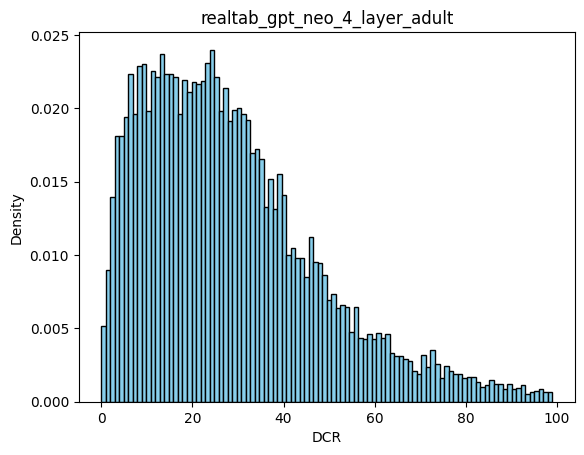

realtab_gpt_neo_6_layer_adult


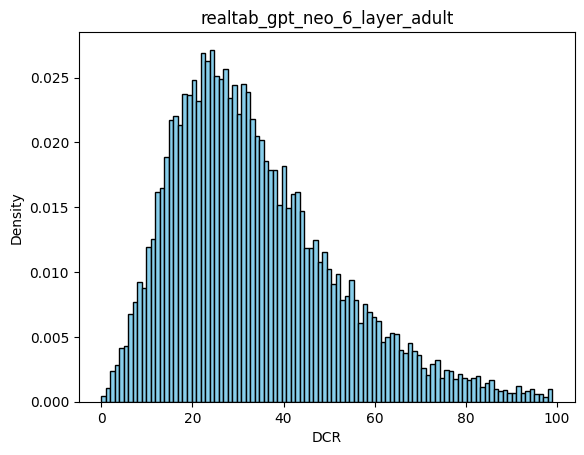

realtab_gpt_neo_8_layer_adult


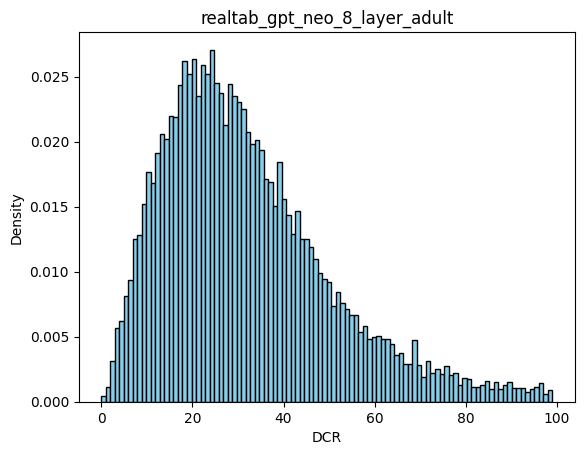

realtab_llama_1_layer_adult


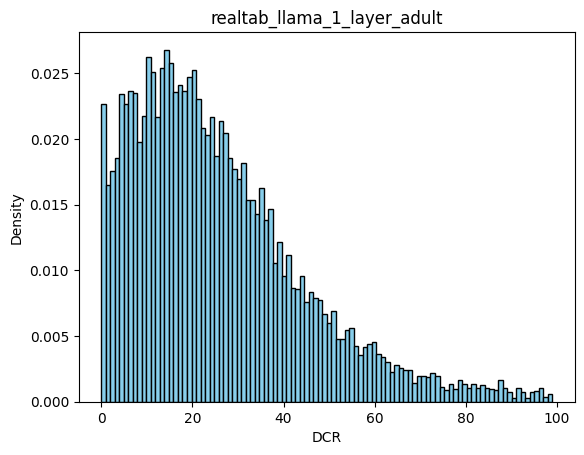

realtab_llama_2_layer_adult


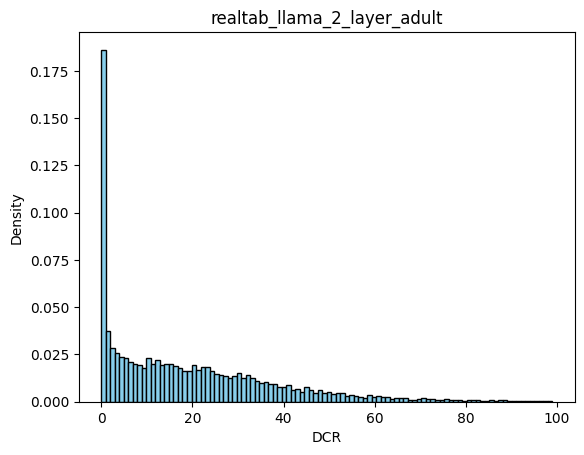

In [17]:
path_to_synthetic_dataset = "adult"

dcr_adult(org_train_df=org_train_df, org_test_df=org_test_df, 
        path_to_synthetic_dataset=path_to_synthetic_dataset)